# IBM Developer Skills Network

# Training a Neural Network with Momentum

In [1]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np

import torch
import torch.nn as nn
import torch.nn.functional as F  # activation function
from torch.utils.data import Dataset, DataLoader

torch.manual_seed(1)
np.random.seed(1)

In [2]:
# Define a function to plot the decision region

def plot_decision_regions_3class(model, data_set):
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA','#00AAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00','#00AAFF'])
    X=data_set.x.numpy()
    y=data_set.y.numpy()
    h = .02
    x_min, x_max = X[:, 0].min() - 0.1 , X[:, 0].max() + 0.1 
    y_min, y_max = X[:, 1].min() - 0.1 , X[:, 1].max() + 0.1 
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
    XX=torch.torch.Tensor(np.c_[xx.ravel(), yy.ravel()])
    _,yhat=torch.max(model(XX),1)
    yhat=yhat.numpy().reshape(xx.shape)
    plt.pcolormesh(xx, yy, yhat, cmap=cmap_light, shading='auto')
    plt.plot(X[y[:]==0,0], X[y[:]==0,1], 'ro', label='y=0')
    plt.plot(X[y[:]==1,0], X[y[:]==1,1], 'go', label='y=1')
    plt.plot(X[y[:]==2,0], X[y[:]==2,1], 'o', label='y=2')
    plt.title("decision region")
    plt.legend()

In [3]:
# Create the dataset class

class Data(Dataset):
    
    # modified from: http://cs231n.github.io/neural-networks-case-study/
    # Constructor
    def __init__(self, K=3, N=500):
        D = 2
        X = np.zeros((N * K, D)) # data matrix (each row = single example)
        y = np.zeros(N * K, dtype='uint8') # class labels
        for j in range(K):
          ix = range(N * j, N * (j + 1))
          r = np.linspace(0.0, 1, N) # radius
          t = np.linspace(j * 4, (j + 1) * 4, N) + np.random.randn(N) * 0.2 # theta
          X[ix] = np.c_[r * np.sin(t), r * np.cos(t)]
          y[ix] = j
    
        self.y = torch.from_numpy(y).type(torch.LongTensor)
        self.x = torch.from_numpy(X).type(torch.FloatTensor)
        self.len = y.shape[0]
            
    # Getter
    def __getitem__(self, index):    
        return self.x[index], self.y[index]
    
    # Get Length
    def __len__(self):
        return self.len
    
    # Plot the diagram
    def plot_data(self):
        plt.plot(self.x[self.y[:] == 0, 0].numpy(), self.x[self.y[:] == 0, 1].numpy(), 'o', label="y=0")
        plt.plot(self.x[self.y[:] == 1, 0].numpy(), self.x[self.y[:] == 1, 1].numpy(), 'ro', label="y=1")
        plt.plot(self.x[self.y[:] == 2, 0].numpy(),self.x[self.y[:] == 2, 1].numpy(), 'go',label="y=2")
        plt.legend()

# Neural Network Module and Function for Training

In [4]:
class Net(nn.Module):
    
    # Constructor
    # Given a list of integers, Layers, we create layers of the neural network where each integer in Layers corresponds to the layers number of neurons
    def __init__(self, Layers):
        super(Net, self).__init__()
        self.hidden = nn.ModuleList()
        for input_size, output_size in zip(Layers, Layers[1:]):
            self.hidden.append(nn.Linear(input_size, output_size))
    
    # Prediction
    # Puts the X value through each layer of the neural network while using the RELU activation function in between. The final output is not put through RELU.
    def forward(self, x):
        L = len(self.hidden)
        for (l, linear_transform) in zip(range(L), self.hidden):
            if l < L - 1:
                x = F.relu(linear_transform(x))    
            else:
                x = linear_transform(x)
        return x

# Create a function for training the model

In [5]:
def train(data_set, model, criterion, train_loader, optimizer, epochs=100):
    # Lists to keep track of loss and accuracy
    LOSS = []
    ACC = []
    # Number of times we train on the entire dataset
    for epoch in range(epochs):
        # For batch in train laoder
        for x, y in train_loader:
            # Resets the calculated gradient value, this must be done each time as it accumulates if we do not reset
            optimizer.zero_grad()
            # Makes a prediction based on X value
            yhat = model(x)
            # Measures the loss between prediction and acutal Y value
            loss = criterion(yhat, y)
            # Calculates the gradient value with respect to each weight and bias
            loss.backward()
            # Updates the weight and bias according to calculated gradient value
            optimizer.step()
        # Saves loss and accuracy
        LOSS.append(loss.item())
        ACC.append(accuracy(model,data_set))
        
    # Prints the Loss and Accuracy vs Epoch graph
    results ={"Loss":LOSS, "Accuracy":ACC}
    fig, ax1 = plt.subplots()
    color = 'tab:red'
    ax1.plot(LOSS,color=color)
    ax1.set_xlabel('epoch', color=color)
    ax1.set_ylabel('total loss', color=color)
    ax1.tick_params(axis = 'y', color=color)
    
    ax2 = ax1.twinx()  
    color = 'tab:blue'
    ax2.set_ylabel('accuracy', color=color)  # we already handled the x-label with ax1
    ax2.plot(ACC, color=color)
    ax2.tick_params(axis='y', color=color)
    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    
    plt.show()
    return results

# Define a function used to calculate accuracy

In [6]:
def accuracy(model, data_set):
    _, yhat = torch.max(model(data_set.x), 1)
    return (yhat == data_set.y).numpy().mean()

# Train Different Networks Model different values for the momentum parameter

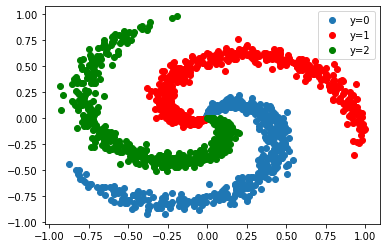

In [7]:
# Create the dataset and plot it
data_set = Data()
data_set.plot_data()
data_set.y = data_set.y.view(-1)

In [8]:
# Initialize a dictionary to contain the cost and accuracy

Results = {"momentum 0": {"Loss": 0, "Accuracy:": 0}, "momentum 0.1": {"Loss": 0, "Accuracy:": 0}}

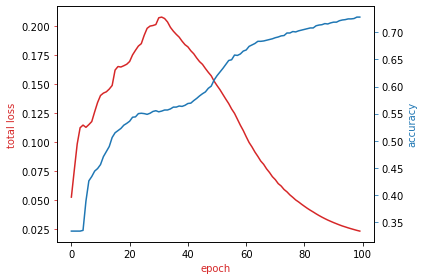

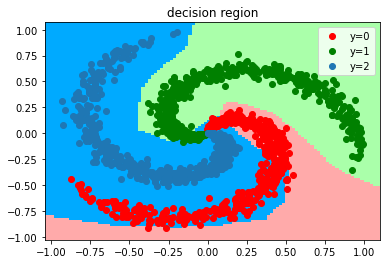

In [9]:
# Train a model with 1 hidden layer and 50 neurons

# size of input layer is 2, hid layer is 50  and out layer is 3
Layers = [2, 50 ,3]

# Create a model
model = Net(Layers)

learning_rate = 0.10

# Optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# Create a Data loader with a batch size of 20
train_loader = DataLoader(dataset=data_set, batch_size=20)

# Criterion
criterion = nn.CrossEntropyLoss()

# train the model
Results['momentum 0'] = train(data_set, model, criterion, train_loader, optimizer, epochs=100)

plot_decision_regions_3class(model, data_set)

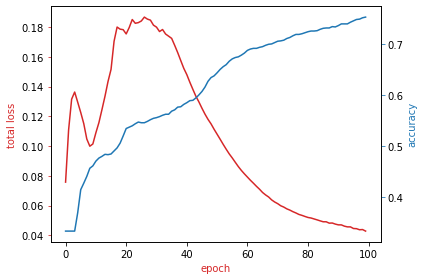

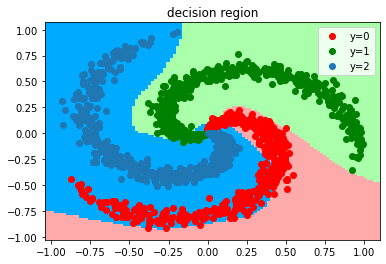

In [10]:
# Train a model with 1 hid layer, 50 neurons with 0.1 momentum

Layers = [2, 50, 3]
model = Net(Layers)
learning_rate = 0.1
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=0.1)
train_loader = DataLoader(dataset = data_set, batch_size=20)
criterion = nn.CrossEntropyLoss()
Results['momentum 0.1'] = train(data_set, model, criterion, train_loader, optimizer, epochs=100)

plot_decision_regions_3class(model, data_set)

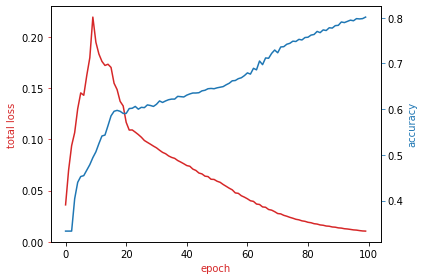

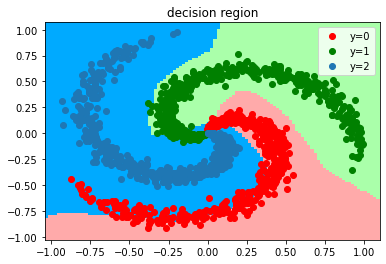

In [11]:
# Create another one with momentum = 0.2
Layers = [2, 50, 3]
# Create a model
model = Net(Layers)
learning_rate = 0.10
# Create an optimizer that updates model parameters using the learning rate, gradient, and 0.2 momentum
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=0.2)
# Create a Data Loader for the training data with a batch size of 20
train_loader = DataLoader(dataset=data_set, batch_size=20)
# We create a criterion which will measure loss
criterion = nn.CrossEntropyLoss()
# Use the training function to train the model for 100 epochs
Results["momentum 0.2"] = train(data_set, model, criterion, train_loader, optimizer, epochs=100)
# Prints the dataset and decision boundaries
plot_decision_regions_3class(model, data_set)

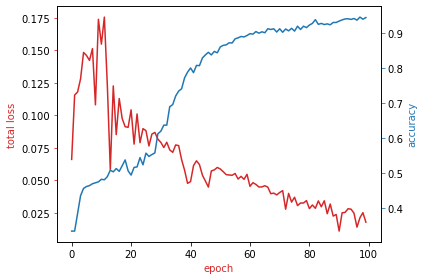

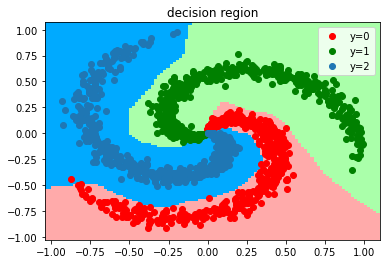

In [12]:
# Another with momentum = 0.5

Layers = [2, 50, 3]
# Create a model
model = Net(Layers)
learning_rate = 0.10
# Create an optimizer that updates model parameters using the learning rate, gradient, and 0.5 momentum
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=0.5)
# Create a Data Loader for the training data with a batch size of 20
train_loader = DataLoader(dataset=data_set, batch_size=20)
# We create a criterion which will measure loss
criterion = nn.CrossEntropyLoss()
# Use the training function to train the model for 100 epochs
Results["momentum 0.5"] = train(data_set, model, criterion, train_loader, optimizer, epochs=100)
# Prints the dataset and decision boundaries
plot_decision_regions_3class(model, data_set)

# Compare results of Different Momentums value

The plot below compares the results of different momentum terms. We see that in general. The Cost decreases proportionally to the momentum term, but larger momentum terms lead to larger oscillations. While the momentum term decreases faster, it seems that a momentum term of 0.2 reaches the smallest value for the cost.

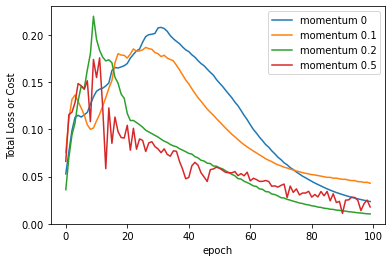

In [13]:
for key, value in Results.items():
    plt.plot(value['Loss'], label=key)
    plt.legend()
    plt.xlabel('epoch')
    plt.ylabel('Total Loss or Cost')

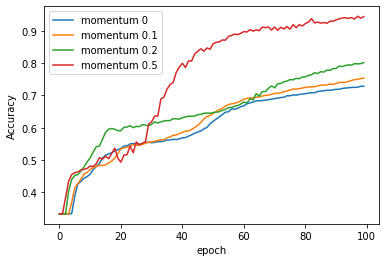

In [15]:
# Plot the accuracy for each term

for key, value in Results.items():
    plt.plot(value['Accuracy'], label=key)
    plt.legend()
    plt.xlabel('epoch')
    plt.ylabel('Accuracy')

The  accuracy seems to be proportional to the momentum term.